<a href="https://colab.research.google.com/github/gkv856/KaggleData/blob/main/S1_prepare_embedding_model_AutoVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing dependencies

In [1]:
pip install webrtcvad

     |████████████████████████████████| 66 kB 3.9 MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp37-cp37m-linux_x86_64.whl size=72362 sha256=b341d9446fa5a7636eae0629a785c6410ab26e97d2d74ba925d0cc0b3188c05b
  Stored in directory: /root/.cache/pip/wheels/11/f9/67/a3158d131f57e1c0a7d8d966a707d4a2fb27567a4fe47723ad
Successfully built webrtcvad


# Clone the git repository

In [2]:
!git clone https://github.com/gkv856/end2end_auto_voice_conversion.git

Cloning into 'end2end_auto_voice_conversion'...
remote: Enumerating objects: 410, done.
remote: Counting objects: 100% (410/410), done.
remote: Compressing objects: 100% (330/330), done.
remote: Total 410 (delta 94), reused 368 (delta 52), pack-reused 0
Receiving objects: 100% (410/410), 39.11 MiB | 16.16 MiB/s, done.
Resolving deltas: 100% (94/94), done.


# Rename the folder from "end2end_auto_voice_conversion" to "AVC"
we have to use this as package name whenever you see error of NOT FOUND

E.g.


# Couple of manual changes
1. Double click and open 'constants.py' file located at '/content/AVC/strings/constants.py'
2. Change line 6 from 'from utils.dict_to_dot import GetDictWithDotNotation' to: "from AVC.utils.dict_to_dot import GetDictWithDotNotation' as mentioned above, we need to this for every package not found error
3. Change line 8 to: PROJECT_NAME = "AVC"
4. Change line 10 to: current_dir = Path("/content/AVC/strings/constants.py")

In [4]:
from AVC.strings.constants import hp

Device type available = 'cuda:0'


In [8]:
from AVC.s1_data_prep.audio_to_spectrogram import CreateSpectrogram
from AVC.s2_generalized_end2end_loss_GE2E.s4_train_embed_model import TrainEmbedModel

In [9]:
# step 1 prepare the spectrogram from the raw audio file
cr_obj = CreateSpectrogram(hp)
cr_obj.save_spectrogram_tisv()

Spectrograms saved!!


In [10]:
hp.raw_audio.raw_audio_path = "/content/AVC/static/raw_data/librispeech_test-other"
# step 1 prepare the spectrogram from the raw audio file
cr_obj = CreateSpectrogram(hp)
cr_obj.save_spectrogram_tisv()

Spectrograms saved!!


In [11]:

# step2 of the Auto voice cloning is to: train the embedding model
# to get a user's embedding or 256 dim vector representing user's speaking style

hp.m_ge2e.training_epochs = 2000
hp.m_ge2e.checkpoint_interval = 500
hp.m_ge2e.min_test_loss = 4

hp.m_ge2e.training_N = 4
hp.m_ge2e.training_M = 16

hp.m_ge2e.test_N = 4
hp.m_ge2e.test_M = 16

hp.m_ge2e.lr = 0.05
# creating training object
train_emb_model_obj = TrainEmbedModel(hp)

# training the model
model, train_loss, test_loss = train_emb_model_obj.train_model(lr_reduce=500, 
                                                               epoch_print=100, 
                                                               dot_print=10)
print(2)


Epoch:[100/2000] .......... Train_Loss:63.5693	 Test_Loss:33.8007	00:00:52
Epoch:[200/2000] .......... Train_Loss:51.0355	 Test_Loss:20.6956	00:00:50
Epoch:[300/2000] .......... Train_Loss:13.8111	 Test_Loss:11.2084	00:00:50
Epoch:[400/2000] .......... Train_Loss:13.9337	 Test_Loss:28.8789	00:00:50
Epoch:[500/2000] .......... Train_Loss:0.7319	 Test_Loss:39.5424	00:00:50
Reducing learning rate from 0.05 to 0.025
Model saved as 'ckpt_epoch_500_L_0.7319.pth'
Epoch:[600/2000] .......... Train_Loss:2.8943	 Test_Loss:8.4008	00:00:50
Epoch:[700/2000] .......... Train_Loss:3.3734	 Test_Loss:34.8808	00:00:50
Epoch:[800/2000] .......... Train_Loss:1.9816	 Test_Loss:15.1163	00:00:49
Epoch:[900/2000] .......... Train_Loss:7.3848	 Test_Loss:19.4299	00:00:49
Epoch:[1000/2000] .......... Train_Loss:0.7628	 Test_Loss:3.8183	00:00:48
Reducing learning rate from 0.025 to 0.0125
Model saved as 'ckpt_epoch_1000_L_0.7628.pth'
Epoch:[1100/2000] .......... Train_Loss:0.2877	 Test_Loss:33.4840	00:00:49
Epoch

In [12]:
hp.m_ge2e.best_model_path = "/content/AVC/static/model_chk_pts/ge2e/final_epoch_2000.model_2000_L_0.0014.pth"
# hp.m_ge2e.best_model_path = "/content/AVC/static/model_chk_pts/ge2e/ckpt_epoch_1000_L_0.0000.pth"


In [14]:
from AVC.s2_generalized_end2end_loss_GE2E.s5_eval_model import calculate_ERR, plot_scatter
from AVC.s2_generalized_end2end_loss_GE2E.s2_model_GE2E_loss_speach_embed import  get_pre_trained_embedding_model

In [15]:
# loading a pre-trained model
model = get_pre_trained_embedding_model(hp)

Pre-trained model loaded /content/AVC/static/model_chk_pts/ge2e/final_epoch_2000.model_2000_L_0.0014.pth


In [16]:
#calculating ERR
calculate_ERR(model, hp, 4, 8)

(4, 8, 4) <class 'numpy.ndarray'> 
 [[[ 0.86020464 -0.27602828 -0.38126817 -0.3130035 ]
  [ 0.86020464 -0.27602828 -0.38126817 -0.3130035 ]
  [ 0.95083535 -0.47956216 -0.47658613 -0.6293779 ]
  [ 0.86020464 -0.27602828 -0.38126817 -0.3130035 ]
  [ 0.95083535 -0.47956216 -0.47658613 -0.6293779 ]
  [ 0.95083535 -0.47956216 -0.47658613 -0.6293779 ]
  [ 0.95083535 -0.47956216 -0.47658613 -0.6293779 ]
  [ 0.95083535 -0.47956216 -0.47658613 -0.6293779 ]]

 [[-0.39126822  0.85001224  0.29497638  0.45192498]
  [-0.30120063  0.25264636 -0.21605237  0.71251893]
  [-0.21899682  0.60528016  0.19310816 -0.12611543]
  [-0.21899682  0.60528016  0.19310816 -0.12611543]
  [-0.34768388  0.87695533  0.17516989  0.15823032]
  [-0.30120063  0.25264636 -0.21605237  0.71251893]
  [-0.34768388  0.87695533  0.17516989  0.15823032]
  [-0.39126822  0.85001224  0.29497638  0.45192498]]

 [[-0.4138584   0.11867442  0.9899722  -0.14820273]
  [-0.4138584   0.11867442  0.9899722  -0.14820273]
  [-0.35202476 -0.042170

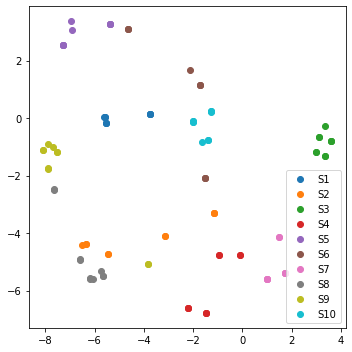

In [19]:

# plotting speaker embeddings
plot_scatter(model, hp, 10, 10)

In [20]:
hp.m_ge2e.best_model_path = "/content/AVC/static/model_chk_pts/ge2e/m_best_1000_L_3.8183.pth"
# loading a pre-trained model
model = get_pre_trained_embedding_model(hp)

Pre-trained model loaded /content/AVC/static/model_chk_pts/ge2e/m_best_1000_L_3.8183.pth


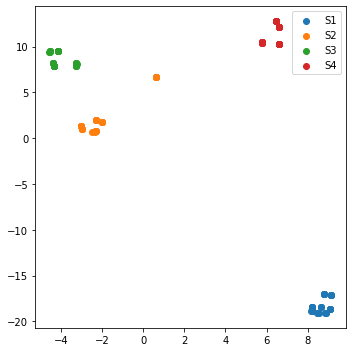

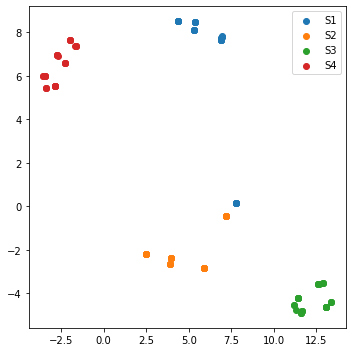

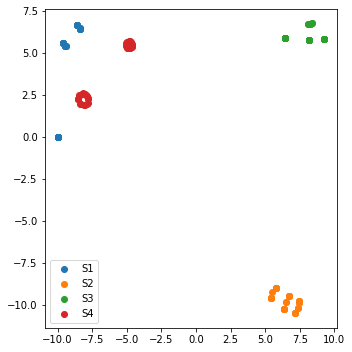

In [24]:

# plotting speaker embeddings
plot_scatter(model, hp, 4, 32)

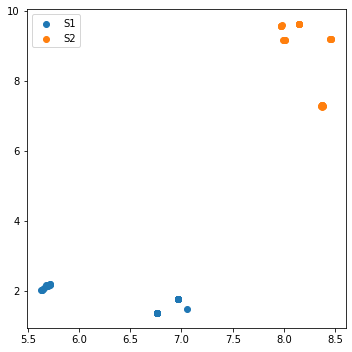

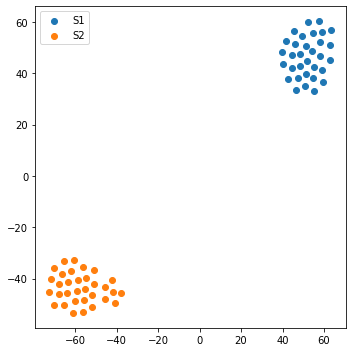

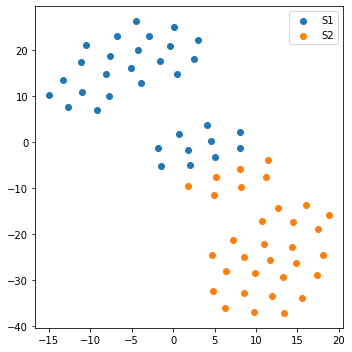

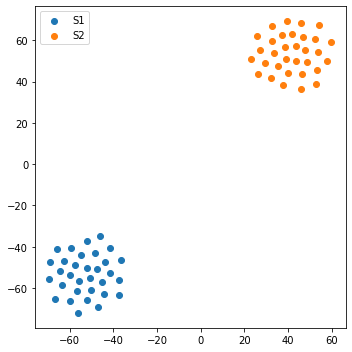

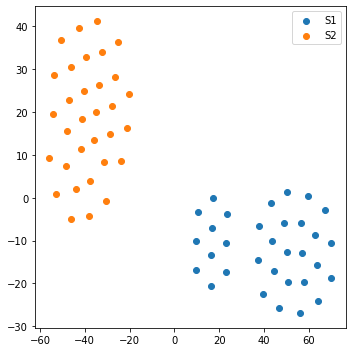

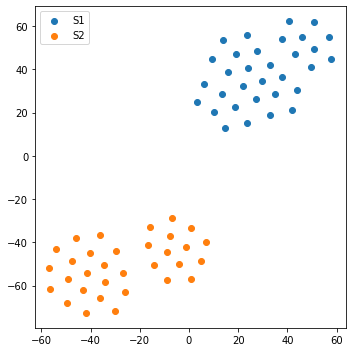

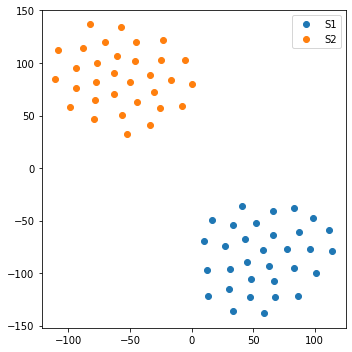

In [26]:

# plotting speaker embeddings
plot_scatter(model, hp, 2, 32)

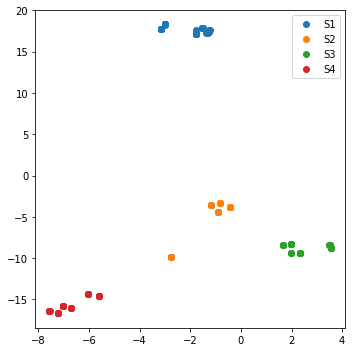

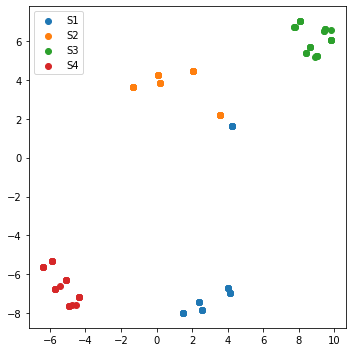

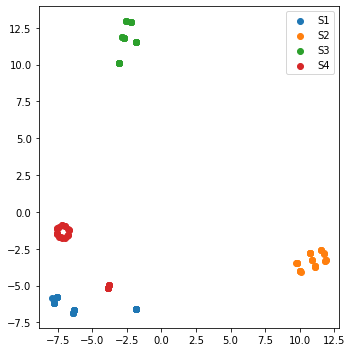

In [27]:

# plotting speaker embeddings
plot_scatter(model, hp, 4, 32)

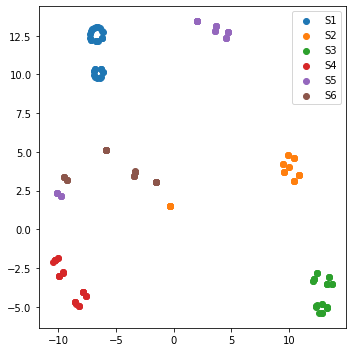

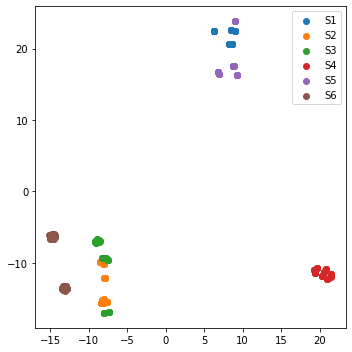

In [28]:

# plotting speaker embeddings
plot_scatter(model, hp, 6, 32)

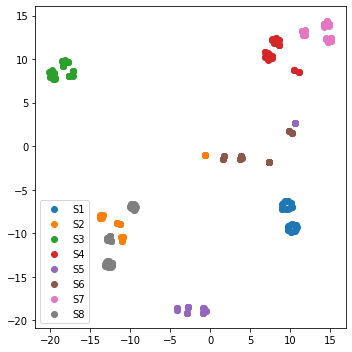

In [29]:

# plotting speaker embeddings
plot_scatter(model, hp, 8, 32)

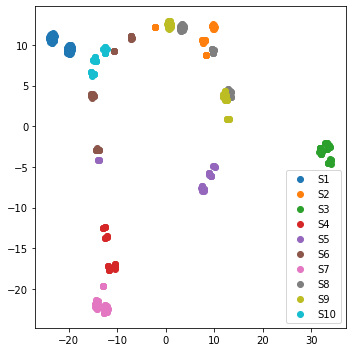

In [31]:

# plotting speaker embeddings
plot_scatter(model, hp, 10, 32)